<a href="https://colab.research.google.com/github/NUELBUNDI/PDS_PROJECT/blob/main/Final_Project_Lee_Bundi_102586.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
from bokeh.io import output_notebook
from bokeh import models, palettes, transform
from bokeh.plotting import figure, show
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import cluster, decomposition, pipeline, preprocessing
import statsmodels

In [ ]:
#df = pd.read_excel("http://qrc.depaul.edu/Excel_Files/Presidents.xls") #pip install xlrd
#df = pd.read_csv('https://raw.githubusercontent.com/chrisnjunge/DStest/master/soccerratings.csv')
df = pd.read_csv('https://github.com/NUELBUNDI/Principles_Data_Science/blob/main/kmpgcustomerpurchasedetails.csv')

ParserError: ignored

In [ ]:
df.columns

Index(['SupplierID', 'ShipperID', 'CategoryID', 'ProductID', 'CustomerID',
       'EmployeeID', 'OrderID', 'OrderDetailID', 'Quantity', 'OrderDate',
       'LastName', 'FirstName', 'BirthDate', 'Photo', 'Notes', 'CustomerName',
       'ContactName.x', 'Address.x', 'City.x', 'PostalCode.x', 'Country.x',
       'ProductName', 'Unit', 'Price', 'CategoryName', 'Description',
       'ShipperName', 'Phone.x', 'SupplierName', 'ContactName.y', 'Address.y',
       'City.y', 'PostalCode.y', 'Country.y', 'Phone.y'],
      dtype='object')

In [ ]:
df

,President,Years in office,Year first inaugurated,Age at inauguration,State elected from,# of electoral votes,# of popular votes,National total votes,Total electoral votes,Rating points,Political Party,Occupation,College,% electoral,% popular
0,George Washington,8.0,1789,57,Virginia,69,NA(),NA(),69,842.0,None,Planter,None,100.000000,NA()
1,John Adams,4.0,1797,61,Massachusetts,132,NA(),NA(),139,598.0,Federalist,Lawyer,Harvard,94.964029,NA()
2,Thomas Jefferson,8.0,1801,57,Virginia,73,NA(),NA(),137,711.0,Democratic-Republican,"Planter, Lawyer",William and Mary,53.284672,NA()
3,James Madison,8.0,1809,57,Virginia,122,NA(),NA(),176,567.0,Democratic-Republican,Lawyer,Princeton,69.318182,NA()
4,James Monroe,8.0,1817,58,Virginia,183,NA(),NA(),221,602.0,Democratic-Republican,Lawyer,William and Mary,82.805430,NA()
5,John Quincy Adams,4.0,1825,57,Massachusetts,84,NA(),NA(),261,564.0,Democratic-Republican,Lawyer,Harvard,32.183908,NA()
6,Andrew Jackson,8.0,1829,61,Tennessee,178,642553,1148018,261,632.0,Democrat,Lawyer,None,68.199234,55.9706
7,Martin Van Buren,4.0,1837,54,New York,170,764176,1503534,294,429.0,Democrat,Lawyer,None,57.823129,50.8253
8,William Henry Harrison,0.8,1841,68,Ohio,234,1275390,2411808,294,329.0,Whig,Soldier,Hampden-Sydney,79.591837,52.8811
9,James K. Polk,4.0,1845,49,Tennessee,170,1339494,2703659,275,632.0,Democrat,Lawyer,U. of North Carolina,61.818182,49.5437


In [ ]:
df.head()

,President,Years in office,Year first inaugurated,Age at inauguration,State elected from,# of electoral votes,# of popular votes,National total votes,Total electoral votes,Rating points,Political Party,Occupation,College,% electoral,% popular
0,George Washington,8.0,1789,57,Virginia,69,NA(),NA(),69,842.0,None,Planter,None,100.000000,NA()
1,John Adams,4.0,1797,61,Massachusetts,132,NA(),NA(),139,598.0,Federalist,Lawyer,Harvard,94.964029,NA()
2,Thomas Jefferson,8.0,1801,57,Virginia,73,NA(),NA(),137,711.0,Democratic-Republican,"Planter, Lawyer",William and Mary,53.284672,NA()
3,James Madison,8.0,1809,57,Virginia,122,NA(),NA(),176,567.0,Democratic-Republican,Lawyer,Princeton,69.318182,NA()
4,James Monroe,8.0,1817,58,Virginia,183,NA(),NA(),221,602.0,Democratic-Republican,Lawyer,William and Mary,82.805430,NA()


In [ ]:
df.head().T

,0,1,2,3,4
President,George Washington,John Adams,Thomas Jefferson,James Madison,James Monroe
Years in office,8,4,8,8,8
Year first inaugurated,1789,1797,1801,1809,1817
Age at inauguration,57,61,57,57,58
State elected from,Virginia,Massachusetts,Virginia,Virginia,Virginia
# of electoral votes,69,132,73,122,183
# of popular votes,NA(),NA(),NA(),NA(),NA()
National total votes,NA(),NA(),NA(),NA(),NA()
Total electoral votes,69,139,137,176,221
Rating points,842,598,711,567,602


In [ ]:
df.dtypes

President                  object
Years in office           float64
Year first inaugurated      int64
Age at inauguration         int64
State elected from         object
# of electoral votes        int64
# of popular votes         object
National total votes       object
Total electoral votes       int64
Rating points             float64
Political Party            object
Occupation                 object
College                    object
% electoral               float64
% popular                  object
dtype: object

In [ ]:
len(df.columns)

15

In [ ]:
len(df['President'].unique())

34

In [ ]:
df.President.value_counts()

Grover Cleveland          2
Jimmy Carter              1
James Buchanan            1
George Washington         1
Bill Clinton              1
Warren G. Harding         1
George W. Bush            1
James K. Polk             1
Woodrow Wilson            1
Richard M. Nixon          1
Zachary Taylor            1
John Quincy Adams         1
George Bush               1
Andrew Jackson            1
William McKinley          1
Martin Van Buren          1
Abraham Lincoln           1
Thomas Jefferson          1
Benjamin Harrison         1
Ronald Reagan             1
William Howard Taft       1
James A. Garfield         1
John Adams                1
James Monroe              1
James Madison             1
Dwight D. Eisenhower      1
Rutherford B. Hayes       1
John F. Kennedy           1
Franklin Roosevelt        1
Franklin Pierce           1
Ulysses S. Grant          1
Barack Obama              1
Herbert Hoover            1
William Henry Harrison    1
Name: President, dtype: int64

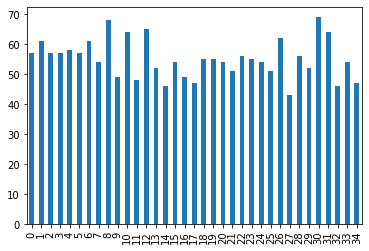

In [ ]:
df['Age at inauguration'].plot(kind='bar')

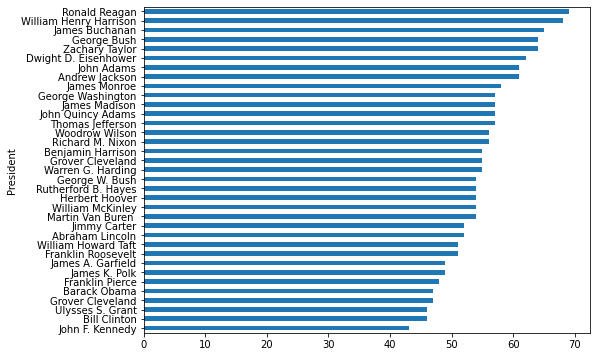

In [ ]:
(df
 .set_index('President')
 ['Age at inauguration']
 .sort_values()
 #['# of electoral votes']
 .plot(kind='barh', figsize=(8,6))
 )

In [ ]:
df['Age at inauguration'].agg(['min', 'mean', 'max'])

min     43.000000
mean    55.085714
max     69.000000
Name: Age at inauguration, dtype: float64

In [ ]:
df['Age at inauguration'].describe()

count    35.000000
mean     55.085714
std       6.381828
min      43.000000
25%      51.000000
50%      55.000000
75%      57.500000
max      69.000000
Name: Age at inauguration, dtype: float64

In [ ]:
df.describe()

,Years in office,Year first inaugurated,Age at inauguration,# of electoral votes,Total electoral votes,Rating points,% electoral
count,34.000000,35.000000,35.000000,35.000000,35.000000,33.000000,35.000000
mean,5.185294,1892.542857,55.085714,261.114286,385.085714,552.606061,68.048420
std,2.638426,64.758530,6.381828,118.620198,143.817567,159.117280,15.092928
min,0.500000,1789.000000,43.000000,69.000000,69.000000,259.000000,32.183908
25%,4.000000,1843.000000,51.000000,176.000000,292.000000,444.000000,57.123855
50%,4.000000,1885.000000,55.000000,234.000000,401.000000,564.000000,66.459627
75%,8.000000,1943.000000,57.500000,343.000000,531.000000,632.000000,80.756370
max,12.000000,2009.000000,69.000000,489.000000,538.000000,900.000000,100.000000


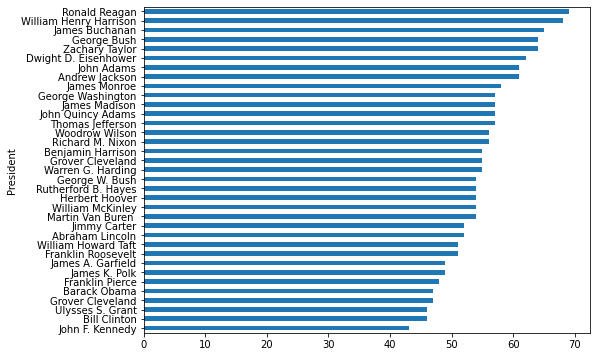

In [ ]:
(df
 .set_index('President')
 ['Age at inauguration']
 .sort_values()
 #['# of electoral votes']
 .plot(kind='barh', figsize=(8,6))
 )

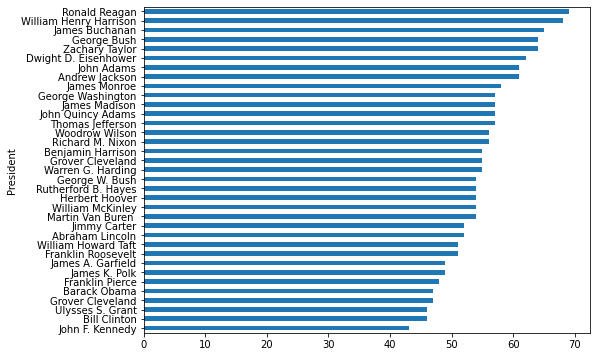

In [ ]:
(df
 .set_index('President')
 ['Age at inauguration']
 .sort_values()
 #['# of electoral votes']
 .plot(kind='barh', figsize=(8,6))
 )

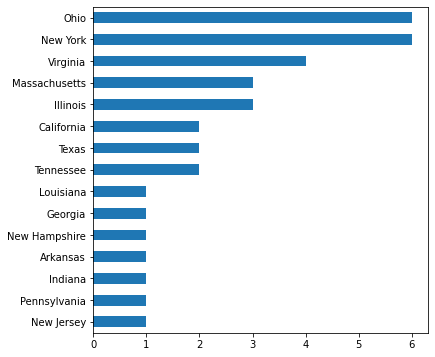

In [ ]:
(df
 ['State elected from']
 .value_counts()
 .sort_values()
 .plot(kind="barh", figsize=(6,6))
 )

In [ ]:
# missing data
((df
  .isna()
  .mean()
  * 100)
  .pipe(lambda ser : ser[ser > 0])
)

Years in office    2.857143
Rating points      5.714286
dtype: float64

In [ ]:
# PCA
cols = ['Age at inauguration', '# of electoral votes', '# of popular votes', 'National total votes', 'Total electoral votes', 'Rating points']
# standardize data
model = pipeline.Pipeline([('std', preprocessing.StandardScaler()),
                            ('pca', decomposition.PCA(random_state=42))])
X = pd.get_dummies(df[cols], drop_first=True).fillna(0)
X_pca = model.fit_transform(X)
pca = model.named_steps['pca']

In [ ]:
X_pca.shape

(35, 35)

In [ ]:
model.steps

[('std', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('pca',
  PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
      svd_solver='auto', tol=0.0, whiten=False))]

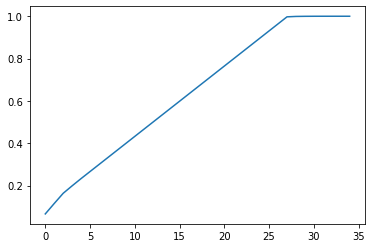

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.06649199, 0.11577059, 0.16392687, 0.19922013, 0.23344434,
       0.26665118, 0.29985801, 0.33306484, 0.36627167, 0.3994785 ,
       0.43268533, 0.46589216, 0.49909899, 0.53230582, 0.56551266,
       0.59871949, 0.63192632, 0.66513315, 0.69833998, 0.73154681,
       0.76475364, 0.79796047, 0.8311673 , 0.86437414, 0.89758097,
       0.9307878 , 0.96399463, 0.99720146, 0.99910077, 0.99966828,
       0.99991054, 0.99997159, 1.        , 1.        , 1.        ])

In [ ]:
# Find columns that most influence components
comps = pd.DataFrame(pca.components_, columns=X.columns)
pca_cols = set()
num_comps = 2
for i in range(num_comps):
    parts = comps.iloc[i][comps.iloc[i].abs() > .2]
    pca_cols.update(set(parts.index))
pca_cols

{'# of electoral votes',
 '# of popular votes_43904153',
 '# of popular votes_69492376',
 '# of popular votes_NA()',
 'Age at inauguration',
 'National total votes_129438754',
 'National total votes_86515221',
 'National total votes_NA()',
 'Rating points',
 'Total electoral votes'}

In [ ]:
# How original columns impact each component
pd.DataFrame(pca.components_, columns=X.columns).loc[:,list(pca_cols)].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
National total votes_NA(),0.376939,0.070483,-0.040647,-0.399168,-0.110461,3.620872e-17,-1.118226e-17,-1.626878e-17,3.067019e-16,1.525405e-17,-9.356456e-18,2.259745e-17,7.555061e-17,-3.106383e-17,-5.192859e-17,-1.846837e-17,6.389581e-17,2.279717e-18,-1.598220e-16,-7.782148e-17,-6.300874e-17,-1.749438e-16,-2.794269e-17,8.665602e-17,6.762109e-17,5.644396e-17,3.969693e-18,-1.058291e-16,-0.407350,-0.008471,-0.051997,0.046705,-0.094176,-1.016010e-01,-1.327437e-01
Rating points,0.137575,0.320370,-0.441630,0.040376,-0.009274,-3.005016e-17,9.471035e-17,2.258389e-17,6.955364e-16,1.511045e-17,2.301139e-17,-8.701475e-17,-8.510867e-17,3.357896e-17,1.481829e-16,4.818996e-17,-4.730231e-17,-1.364723e-17,-2.000008e-17,-3.733091e-17,1.095976e-17,2.503648e-16,2.222941e-18,-4.963421e-17,3.662333e-17,-1.403892e-16,9.735080e-17,-1.106074e-16,0.302536,0.551860,0.039273,0.385634,-0.367898,-3.898117e-16,-5.078138e-16
Total electoral votes,-0.476937,0.038964,-0.023050,0.017323,-0.127260,9.210406e-17,-2.386106e-17,-1.508838e-16,4.545041e-15,2.482770e-16,1.884264e-17,-4.395937e-17,-3.216029e-17,-3.181682e-16,3.007350e-16,-3.196760e-16,1.268232e-16,-2.812689e-16,-3.072414e-16,-8.448257e-17,1.487421e-16,1.293036e-17,2.087781e-16,-7.313072e-17,5.844785e-16,-1.301112e-16,-2.769171e-16,-4.116533e-16,-0.336438,-0.293455,0.511151,0.324761,-0.433515,1.457110e-16,-4.235034e-17
# of popular votes_69492376,-0.121685,-0.206057,0.125059,-0.207564,0.032538,2.167391e-02,-2.108452e-01,-1.204467e-01,1.101486e-01,1.453174e-01,3.437896e-02,3.732929e-02,8.617789e-02,-1.335601e-01,-1.922829e-01,-1.696548e-01,-5.295129e-03,-1.632496e-01,-5.765774e-02,1.694328e-02,-1.071323e-02,-1.199681e-01,2.155303e-01,7.445263e-03,1.748272e-01,-2.983462e-02,9.515178e-02,-6.813664e-02,0.063101,0.170653,-0.031381,-0.055145,-0.151942,-2.154312e-02,-2.005885e-01
# of electoral votes,-0.451896,0.180908,-0.028836,-0.099254,0.098902,-3.030645e-17,-2.300837e-17,1.230077e-16,-4.196133e-15,-2.375380e-16,-9.736876e-17,-1.589991e-17,6.643012e-18,3.063700e-16,-4.209223e-16,4.278725e-16,-1.316135e-17,2.019085e-16,2.985577e-16,9.954041e-17,-2.049411e-16,-1.280924e-16,-2.242991e-16,1.235398e-16,-5.210938e-16,1.586492e-16,2.973708e-16,4.355114e-16,-0.200949,-0.047681,-0.724665,0.401527,0.116536,-7.552431e-16,-1.132876e-15
National total votes_86515221,-0.091118,0.264856,0.079453,-0.035323,0.079756,-1.002629e-01,-1.140922e-01,-1.743704e-01,2.069634e-02,-4.967715e-02,-8.730702e-02,-1.809079e-01,-5.866831e-02,-4.796271e-02,-1.967726e-01,1.881144e-01,-4.433097e-02,-5.571026e-02,1.501519e-01,3.983395e-02,-1.764395e-01,9.043468e-02,-2.133896e-02,9.636044e-02,6.306361e-02,2.761526e-01,-1.028594e-01,-3.840643e-02,-0.087321,0.130699,0.102318,-0.118813,0.105930,2.205155e-16,1.718211e-16
National total votes_129438754,-0.121685,-0.206057,0.125059,-0.207564,0.032538,2.167391e-02,-2.108452e-01,-1.204467e-01,1.101486e-01,1.453174e-01,3.437896e-02,3.732929e-02,8.617789e-02,-1.335601e-01,-1.922829e-01,-1.696548e-01,-5.295129e-03,-1.632496e-01,-5.765774e-02,1.694328e-02,-1.071323e-02,-1.199681e-01,2.155303e-01,7.445263e-03,1.748272e-01,-2.983462e-02,9.515178e-02,-6.813664e-02,0.063101,0.170653,-0.031381,-0.055145,-0.151942,2.154312e-02,2.005885e-01
# of popular votes_NA(),0.376939,0.070483,-0.040647,-0.399168,-0.110461,4.661706e-17,-8.057120e-17,-5.096325e-17,3.032325e-16,6.035686e-17,-2.417562e-18,3.647524e-17,2.003946e-17,-4.841106e-17,-4.498970e-17,-1.846837e-17,1.055292e-16,-2.200641e-17,7.610042e-17,6.095640e-17,3.066633e-17,-7.779929e-17,4.144625e-17,-1.048850e-17,8.149888e-17,1.481060e-17,-5.154146e-17,-1.745681e-18,-0.407350,-0.008471,-0.051997,0.046705,-0.094176,1.016010e-01,1.327437e-01
Age at inauguration,0.116882,0.435602,0.340548,0.030465,-0.016578,-1.373108e-16,2.002661e-18,3.191741e-17,1.082582e-15,7.251932e-18,-1.518805e-16,-6.052882e-17,-1.397676e-16,-7.377007e-17,6.840182e-17,-6.259349e-17,2.564495e-17,-1.889007

In [ ]:
# add coloring
(pd.DataFrame(pca.components_, columns=X.columns)
 .loc[:,list(pca_cols)]
 .T
 .style.background_gradient(cmap='RdBu', axis=0)
)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
National total votes_NA(),0.376939,0.070483,-0.040647,-0.399168,-0.110461,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.407350,-0.008471,-0.051997,0.046705,-0.094176,-0.101601,-0.132744
Rating points,0.137575,0.320370,-0.441630,0.040376,-0.009274,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.302536,0.551860,0.039273,0.385634,-0.367898,-0.000000,-0.000000
Total electoral votes,-0.476937,0.038964,-0.023050,0.017323,-0.127260,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.336438,-0.293455,0.511151,0.324761,-0.433515,0.000000,-0.000000
# of popular votes_69492376,-0.121685,-0.206057,0.125059,-0.207564,0.032538,0.021674,-0.210845,-0.120447,0.110149,0.145317,0.034379,0.037329,0.086178,-0.133560,-0.192283,-0.169655,-0.005295,-0.163250,-0.057658,0.016943,-0.010713,-0.119968,0.215530,0.007445,0.174827,-0.029835,0.095152,-0.068137,0.063101,0.170653,-0.031381,-0.055145,-0.151942,-0.021543,-0.200589
# of electoral votes,-0.451896,0.180908,-0.028836,-0.099254,0.098902,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.200949,-0.047681,-0.724665,0.401527,0.116536,-0.000000,-0.000000
National total votes_86515221,-0.091118,0.264856,0.079453,-0.035323,0.079756,-0.100263,-0.114092,-0.174370,0.020696,-0.049677,-0.087307,-0.180908,-0.058668,-0.047963,-0.196773,0.188114,-0.044331,-0.055710,0.150152,0.039834,-0.176439,0.090435,-0.021339,0.096360,0.063064,0.276153,-0.102859,-0.038406,-0.087321,0.130699,0.102318,-0.118813,0.105930,0.000000,0.000000
National total votes_129438754,-0.121685,-0.206057,0.125059,-0.207564,0.032538,0.021674,-0.210845,-0.120447,0.110149,0.145317,0.034379,0.037329,0.086178,-0.133560,-0.192283,-0.169655,-0.005295,-0.163250,-0.057658,0.016943,-0.010713,-0.119968,0.215530,0.007445,0.174827,-0.029835,0.095152,-0.068137,0.063101,0.170653,-0.031381,-0.055145,-0.151942,0.021543,0.200589
# of popular votes_NA(),0.376939,0.070483,-0.040647,-0.399168,-0.110461,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.407350,-0.008471,-0.051997,0.046705,-0.094176,0.101601,0.132744
Age at inauguration,0.116882,0.435602,0.340548,0.030465,-0.016578,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.272124,-0.353434,-0.271576,-0.254901,-0.584567,-0.000000,0.000000
# of popular votes_43904153,-0.091118,0.264856,0.079453,-0.035323,0.079756,-0.100263,-0.114092,-0.174370,0.020696,-0.049677,-0.087307,-0.180908,-0.058668,-0.047963,-0.196773,0.188114,-0.044331,-0.055710,0.150152,0.039834,-0.176439,0.090435,-0.021339,0.096360,0.063064,0.276153,-0.102859,-0.038406,-0.087321,0.130699,0.102318,-0.118813,0.105930,0.000000,0.000000


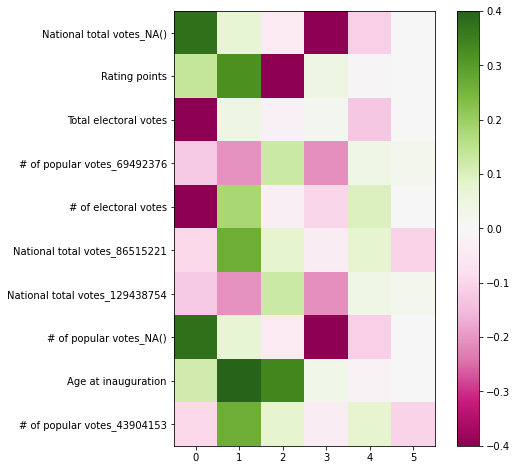

In [ ]:
#Alternate view
fig, ax = plt.subplots(figsize=(8,8))
plt.imshow(pd.DataFrame(pca.components_, columns=X.columns).loc[:5, list(pca_cols)].T, 
           cmap='PiYG', vmin=-.4, vmax=.4)
plt.yticks(range(len(pca_cols)), list(pca_cols))
plt.colorbar()

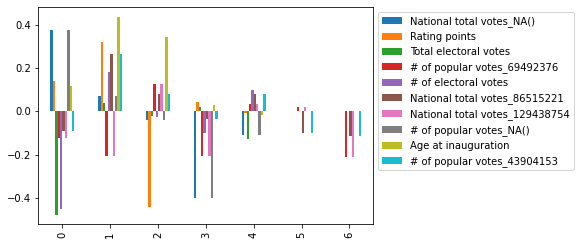

In [ ]:
# visualize amount
comps = pd.DataFrame(pca.components_, columns=X.columns)
comps[list(pca_cols)].iloc[:7].plot.bar().legend(bbox_to_anchor=(1,1))